In [1]:
pr = data.frame(
    poc_rokov = c(4, 7, 9, 12, 3, 5, 11, 21, 1, 14),
    prijem = c(32, 54, 64, 70, 36, 41, 59, 90, 20, 79)
)

pr

poc_rokov,prijem
<dbl>,<dbl>
4,32
7,54
9,64
12,70
3,36
5,41
11,59
21,90
1,20


In [2]:
model <- lm(prijem ~ poc_rokov, data = pr)

In [3]:
pr$predicted = predict(model, data.frame(poc_rokov = pr$poc_rokov))
pr

poc_rokov,prijem,predicted
<dbl>,<dbl>,<dbl>
4,32,37.80282
7,54,48.46059
9,64,55.56578
12,70,66.22355
3,36,34.25023
5,41,41.35541
11,59,62.67096
21,90,98.19687
1,20,27.14505


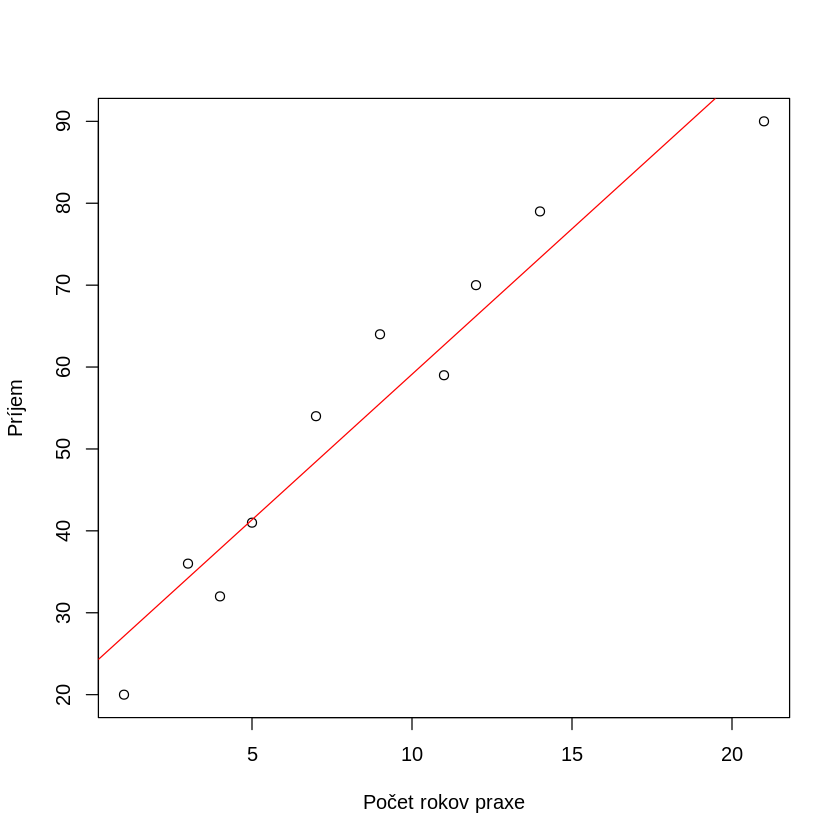

In [4]:
plot(pr$poc_rokov, pr$prijem, xlab = "Počet rokov praxe", ylab = "Príjem")
abline(model, col = "red")

In [5]:
pr1 = data.frame(
    poc_rokov = c(10, 15, 20)
)

pr1

poc_rokov
<dbl>
10
15
20


In [6]:
pr1$predicted = predict(model, pr1)

pr1

poc_rokov,predicted
<dbl>,<dbl>
10,59.11837
15,76.88132
20,94.64428


In [7]:
state = read.csv("./data/state")
head(state)

,X,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
2,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
3,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
4,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
5,California,21198,5114,1.1,71.71,10.3,62.6,20,156361
6,Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


In [8]:
model2 <- lm(Murder ~ Illiteracy + Life.Exp, data = state)

In [9]:
state$Murder_predict = predict(model2, state)

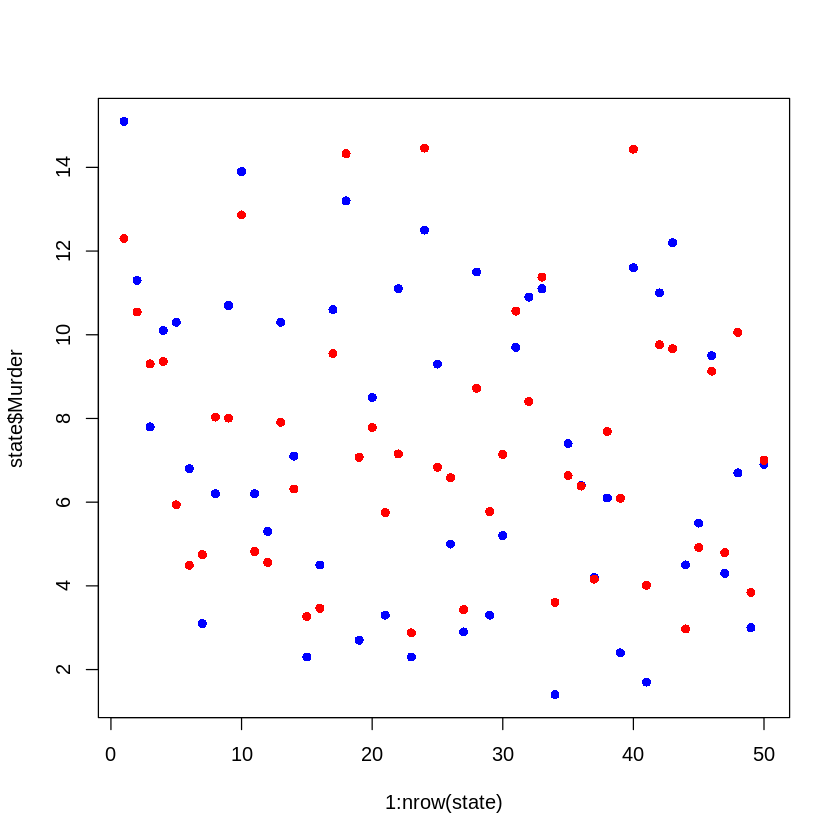

In [10]:
plot(1:nrow(state), state$Murder, col = "blue", pch = 16)
# lines(1:nrow(state), state$Murder_predict, col = "red", pch = 16)
points(1:nrow(state), state$Murder_predict, col = "red", pch = 16)

In [11]:
model2$coefficients

(Intercept)  Illiteracy    Life.Exp 
 114.216241    2.255651   -1.544576

In [12]:
summary(model2)


Call:
lm(formula = Murder ~ Illiteracy + Life.Exp, data = state)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3725 -1.5867  0.0284  1.1919  4.3641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 114.2162    19.6698   5.807 5.27e-07 ***
Illiteracy    2.2557     0.5981   3.772 0.000453 ***
Life.Exp     -1.5446     0.2716  -5.688 7.96e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.063 on 47 degrees of freedom
Multiple R-squared:  0.7004,	Adjusted R-squared:  0.6876 
F-statistic: 54.94 on 2 and 47 DF,  p-value: 4.998e-13


In [13]:
CO2 = read.csv("https://peter.butka.website.tuke.sk/res/CO2.csv")
head(CO2)

,X,Plant,Type,Treatment,conc,uptake
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1,Qn1,Quebec,nonchilled,95,16.0
2,2,Qn1,Quebec,nonchilled,175,30.4
3,3,Qn1,Quebec,nonchilled,250,34.8
4,4,Qn1,Quebec,nonchilled,350,37.2
5,5,Qn1,Quebec,nonchilled,500,35.3
6,6,Qn1,Quebec,nonchilled,675,39.2


In [14]:
CO2 = CO2[, -c(1, 2)]

In [15]:
split <- sample(nrow(CO2), nrow(CO2) * 0.7)

train_data <- CO2[split, ]
test_data <- CO2[-split, ]

In [16]:
library(rpart)

co2_tree <- rpart(Treatment ~ ., data = train_data)

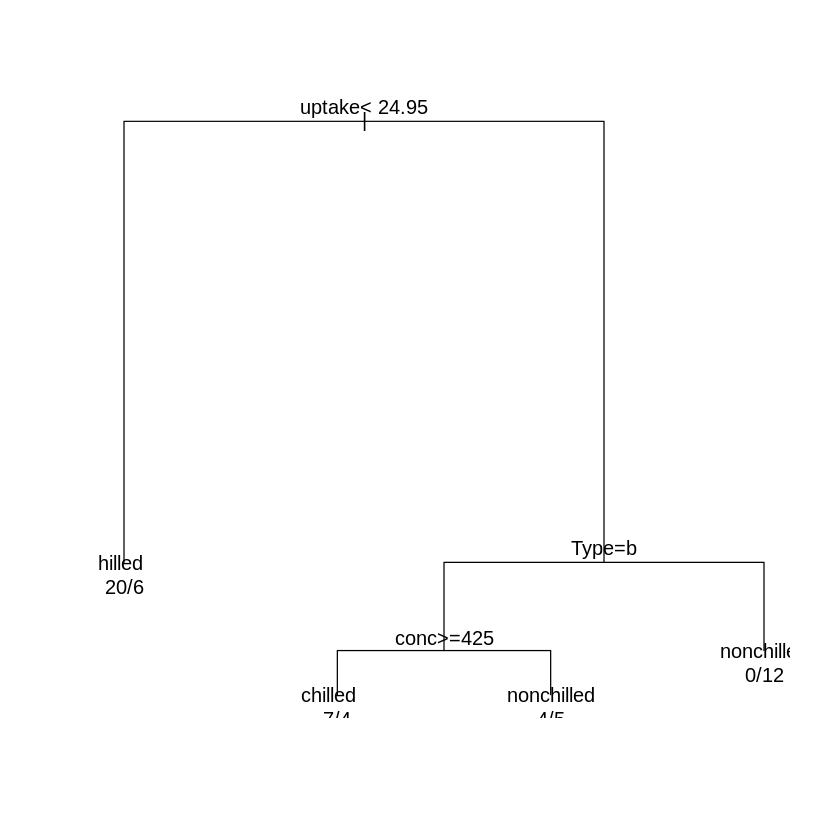

In [18]:
plot(co2_tree)
text(co2_tree, use.n = TRUE)

In [19]:
testPred_tree = predict(co2_tree, test_data)

tbl = table(test_data$Treatment, testPred_tree)
tbl

ERROR: Error in table(test_data$Treatment, testPred_tree): all arguments must have the same length


In [20]:
library(caret)

confusionMatrix(tbl, mode = "prec_recall")

Loading required package: ggplot2

Loading required package: lattice



ERROR: Error in confusionMatrix(tbl, mode = "prec_recall"): object 'tbl' not found


In [27]:
install.packages("naivebayes")
library(naivebayes)

model <- naive_bayes(Treatment ~ conc + uptake, data = train_data)

testPred_tree = predict(model, test_data)

tbl = table(test_data$Treatment, testPred_tree)
tbl

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


            testPred_tree
             chilled nonchilled
  chilled          5          7
  nonchilled       7          7

In [28]:
confusionMatrix(tbl, mode = "prec_recall")

Confusion Matrix and Statistics

            testPred_tree
             chilled nonchilled
  chilled          5          7
  nonchilled       7          7
                                          
               Accuracy : 0.4615          
                 95% CI : (0.2659, 0.6663)
    No Information Rate : 0.5385          
    P-Value [Acc > NIR] : 0.8373          
                                          
                  Kappa : -0.0833         
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
              Precision : 0.4167          
                 Recall : 0.4167          
                     F1 : 0.4167          
             Prevalence : 0.4615          
         Detection Rate : 0.1923          
   Detection Prevalence : 0.4615          
      Balanced Accuracy : 0.4583          
                                          
       'Positive' Class : chilled         
                            

In [29]:
train_data$conc = cut(train_data$conc, 10)
train_data$uptake = cut(train_data$uptake, 10)

In [30]:
test_data$conc = cut(test_data$conc, 10)
test_data$uptake = cut(test_data$uptake, 10)

In [31]:
model <- naive_bayes(Type ~ conc + uptake, data = train_data)

testPred_tree = predict(model, test_data)

tbl = table(test_data$Type, testPred_tree)
tbl

Warning message:
“naive_bayes(): Feature conc - zero probabilities are present. Consider Laplace smoothing.”
Warning message:
“naive_bayes(): Feature uptake - zero probabilities are present. Consider Laplace smoothing.”
Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


             testPred_tree
              Mississippi Quebec
  Mississippi          11      1
  Quebec                7      7

In [32]:
confusionMatrix(tbl, mode = "prec_recall")

Confusion Matrix and Statistics

             testPred_tree
              Mississippi Quebec
  Mississippi          11      1
  Quebec                7      7
                                          
               Accuracy : 0.6923          
                 95% CI : (0.4821, 0.8567)
    No Information Rate : 0.6923          
    P-Value [Acc > NIR] : 0.5941          
                                          
                  Kappa : 0.4023          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
              Precision : 0.9167          
                 Recall : 0.6111          
                     F1 : 0.7333          
             Prevalence : 0.6923          
         Detection Rate : 0.4231          
   Detection Prevalence : 0.4615          
      Balanced Accuracy : 0.7431          
                                          
       'Positive' Class : Mississippi     
                        

In [35]:
indexes <- sample(nrow(CO2), nrow(CO2) * 0.8)

co2_training <- CO2[indexes, c("conc", "uptake")]
co2_test <- CO2[-indexes, c("conc", "uptake")]

In [36]:
co2_trainLabels <- CO2[indexes, c("Treatment")]
co2_testLabels <- CO2[-indexes, c("Treatment")]

In [4]:
library(class)

k <- 2

co2_pred <- knn(co2_training, co2_test, co2_trainLabels, k = k)

In [38]:
tbl <- table(co2_pred, co2_testLabels)
confusionMatrix(tbl, mode = "prec_recall")

Confusion Matrix and Statistics

            co2_testLabels
co2_pred     chilled nonchilled
  chilled          6          4
  nonchilled       6          1
                                          
               Accuracy : 0.4118          
                 95% CI : (0.1844, 0.6708)
    No Information Rate : 0.7059          
    P-Value [Acc > NIR] : 0.9973          
                                          
                  Kappa : -0.2687         
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
              Precision : 0.6000          
                 Recall : 0.5000          
                     F1 : 0.5455          
             Prevalence : 0.7059          
         Detection Rate : 0.3529          
   Detection Prevalence : 0.5882          
      Balanced Accuracy : 0.3500          
                                          
       'Positive' Class : chilled         
                           